### Uber Trip Analysis and Demand Prediction

### 1. Import libraries

In [1]:
# 1. Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### 2. Load dataset

In [2]:
# 2. Load dataset
df = pd.read_csv("Uber-Jan-Feb-FOIL.csv")

In [3]:
df.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


### 3. Data Preprocessing

In [22]:
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month


In [26]:
df.head()

,dispatching_base_number,date,active_vehicles,trips,day,weekday,month
0,B02512,2015-01-01,190,1132,1,Thursday,1
1,B02765,2015-01-01,225,1765,1,Thursday,1
2,B02764,2015-01-01,3427,29421,1,Thursday,1
3,B02682,2015-01-01,945,7679,1,Thursday,1
4,B02617,2015-01-01,1228,9537,1,Thursday,1


✅ Conclusion: \nWe've successfully converted the date into multiple useful features (day, weekday, month)\nwhich help in understanding demand trends based on the calendar.

### 4. Exploratory Data Analysis (EDA)

C:\Users\user\AppData\Local\Temp\ipykernel_16244\3058497265.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weekday', y='trips', data=df, estimator=sum, ci=None, order=[


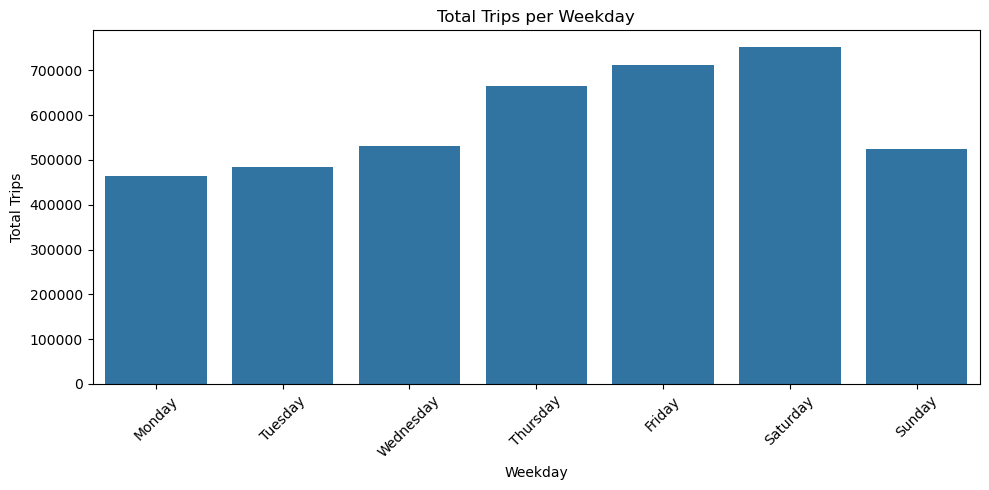

In [7]:
# Trips per weekday
plt.figure(figsize=(10, 5))
sns.barplot(x='weekday', y='trips', data=df, estimator=sum, ci=None, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Total Trips per Weekday")
plt.ylabel("Total Trips")
plt.xlabel("Weekday")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

➤ Conclusion:
 Thursdays and Fridays appear to be the busiest days for Uber rides, suggesting higher demand
 near the weekend.

C:\Users\user\AppData\Local\Temp\ipykernel_16244\4020106856.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='month', y='trips', data=df, estimator=sum, ci=None)


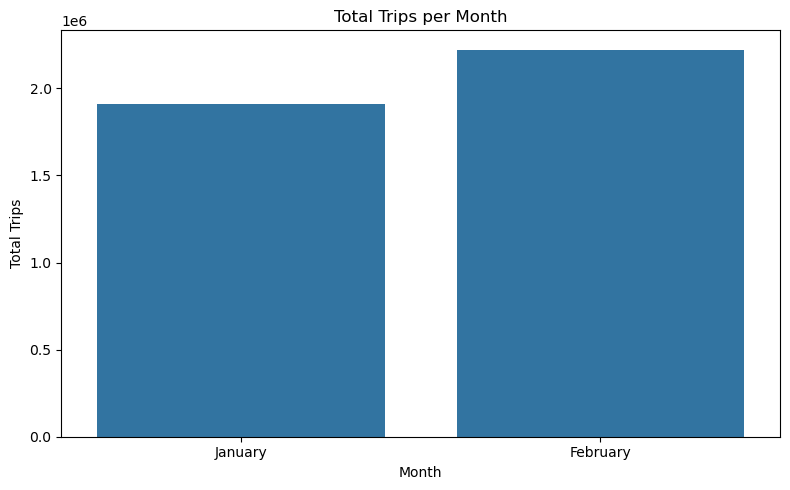

In [8]:
# Trips per month
plt.figure(figsize=(8, 5))
sns.barplot(x='month', y='trips', data=df, estimator=sum, ci=None)
plt.title("Total Trips per Month")
plt.ylabel("Total Trips")
plt.xlabel("Month")
plt.xticks([0, 1], ['January', 'February'])  # Only two months in dataset
plt.tight_layout()
plt.show()

➤ Conclusion:  
         January recorded slightly more trips than February, which could be due to it having more days.

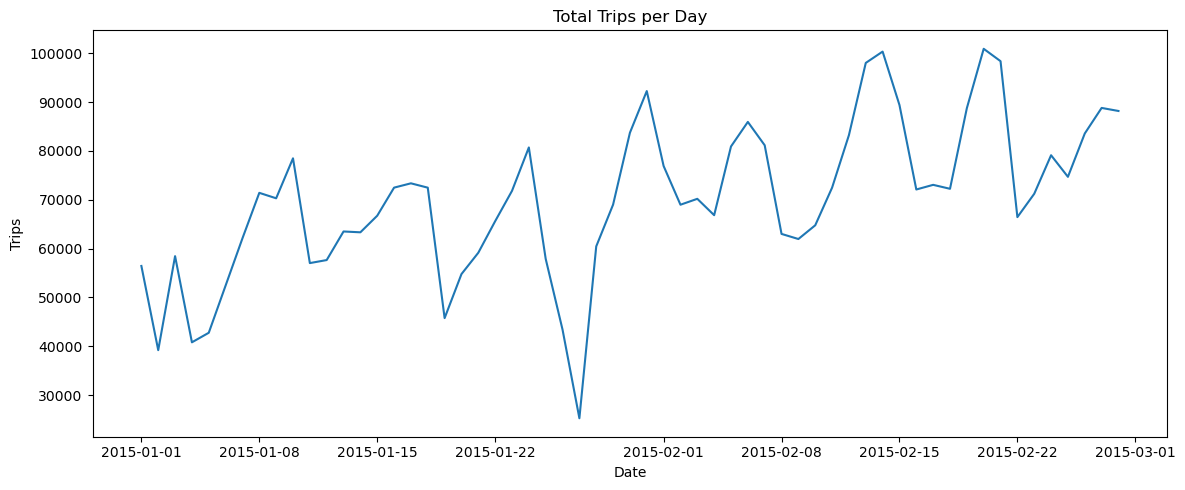

In [10]:
# Visualize Number of Trips Per Day
trips_per_day = df.groupby('date')['trips'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=trips_per_day, x='date', y='trips')
plt.title("Total Trips per Day")
plt.xlabel("Date")
plt.ylabel("Trips")
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

➤ Conclusion:

 There's variability in daily demand, with occasional peaks—could be due to events, weather, etc.

### 5. Feature Engineering

In [11]:
df_dummies = pd.get_dummies(df['dispatching_base_number'], prefix='Base')
df_model = pd.concat([df[['active_vehicles', 'day', 'month']], df_dummies], axis=1)

X = df_model
y = df['trips']


➤ Conclusion:  

 We've built a feature set including active vehicles, date-based info, and dummy variables  
 
 for dispatch base codes, ready for model training.


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dispatching_base_number  354 non-null    object        
 1   date                     354 non-null    datetime64[ns]
 2   active_vehicles          354 non-null    int64         
 3   trips                    354 non-null    int64         
 4   day                      354 non-null    int32         
 5   weekday                  354 non-null    object        
 6   month                    354 non-null    int32         
dtypes: datetime64[ns](1), int32(2), int64(2), object(2)
memory usage: 16.7+ KB


### 6. Model Building

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### 7. Prediction and Evaluation

In [15]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 4286790.403774646
R² Score: 0.960244780618991


 ➤ Conclusion:  
 
MSE gives an idea of average squared error, and R² score (closer to 1) shows model accuracy.  
 These metrics help evaluate how well our model is predicting trip demand.

### Actual vs Predicted

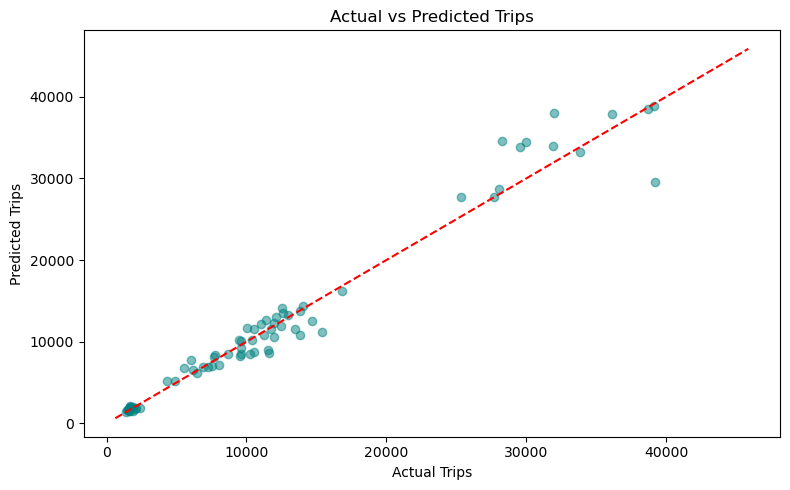

In [16]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.xlabel("Actual Trips")
plt.ylabel("Predicted Trips")
plt.title("Actual vs Predicted Trips")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.tight_layout()
plt.show()

➤ Conclusion:  

 The scatter plot indicates the model's performance — the closer the points are to the red line,  
 
 the better the predictions. The model performs well with some variance.